In [1]:
# importing required libraries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#reading the car data from csv file

import pandas as pd
data=pd.read_csv(r'C:\Users\hbhat\OneDrive\Desktop\VScode\Capstoneproject3\Kolkata.csv')
data

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,Front Brake Type,Rear Brake Type,Tyre Type,Alloy Wheel Size,No Door Numbers,Ground Clearance Unladen,Cargo Volumn,Compression Ratio,Acceleration,Top Speed
0,0,Petrol,Sedan,"70,000",Automatic,3,3rd Owner,Toyota,Toyota Camry,2014,...,Ventilated Disc,Solid Disc,"Tubeless,Radial",17,4,NaN,NaN,NaN,NaN,NaN
1,0,Petrol,Hatchback,"23,981",Manual,1,1st Owner,Datsun,Datsun RediGO,2017,...,Disc,Drum,"Tubeless,Radial",17,5,185mm,222,NaN,NaN,NaN
2,0,Petrol,SUV,"7,100",Automatic,1,1st Owner,Renault,Renault Kiger,2021,...,Disc,Drum,"Tubeless, Radial",17,5,185mm,405,NaN,NaN,NaN
3,0,Petrol,Hatchback,"71,574",Manual,2,2nd Owner,Hyundai,Hyundai i20,2011,...,Disc,Drum,"Tubeless,Radial",14,5,185mm,295 Lit,:1,12.96 Sec,NaN
4,0,Diesel,SUV,"50,000",Automatic,2,2nd Owner,Audi,Audi Q3,2014,...,Ventilated Disc,Drum,"Tubeless,Radial",16,5,185mm,460-litres,:1,8.2 Seconds,212 Kmph
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1376,0,Petrol,Hatchback,"10,000",Manual,1,1st Owner,Maruti,Maruti Celerio,2022,...,Ventilated Disc,Drum,"Tubeless, Radial",13,5,190mm,313,8.9:1,16.2 seconds,141km/hr
1377,0,Petrol,Hatchback,"1,20,000",Manual,1,1st Owner,Maruti,Maruti Alto 800,2014,...,Solid Disc,Drum,Tubeless Tyres,13,5,190mm,177-litres,8.9:1,19 Seconds,140 kmph
1378,0,Petrol,Sedan,"50,000",Automatic,3,3rd Owner,Mercedes-Benz,Mercedes-Benz C-Class,2011,...,Ventilated Disc,Solid Disc,"Tubeless,Radial",17,4,190mm,475-litres,9.3:1,8.8 Seconds,230km/hr
1379,0,Petrol,Hatchback,"40,000",Manual,1,1st Owner,Maruti,Maruti Ritz,2012,...,Ventilated Disc,Drum,"Tubeless,Radial",14,5,190mm,236-liters,9.3:1,15 Seconds,156 Kmph


In [3]:
#check for null records
data.isnull().sum()

it                          0
ft                          0
bt                          1
km                          0
transmission                0
                           ..
Ground Clearance Unladen    1
Cargo Volumn                1
Compression Ratio           3
Acceleration                3
Top Speed                   4
Length: 68, dtype: int64

In [4]:
#column names
data.columns

Index(['it', 'ft', 'bt', 'km', 'transmission', 'ownerNo', 'owner', 'oem',
       'model', 'modelYear', 'centralVariantId', 'variantName', 'price',
       'priceActual', 'priceSaving', 'priceFixedText', 'trendingText',
       'Engine Displacement', 'Fuel Type', 'Insurance Validity', 'Kms Driven',
       'Ownership', 'RTO', 'Registration Year', 'Seats', 'Transmission',
       'Year of Manufacture', 'Features', 'Mileage', 'Engine', 'Max Power',
       'Torque', 'Wheel Size', 'Seats.1', 'Color', 'Engine Type',
       'Displacement', 'Max Torque', 'No of Cylinder', 'Values per Cylinder',
       'Value Configuration', 'Fuel Suppy System', 'BoreX Stroke',
       'Turbo Charger', 'Super Charger', 'Length', 'Width', 'Height',
       'Wheel Base', 'Front Tread', 'Rear Tread', 'Kerb Weight',
       'Gross Weight', 'Gear Box', 'Drive Type', 'Seating Capacity',
       'Steering Type', 'Turning Radius', 'Front Brake Type',
       'Rear Brake Type', 'Tyre Type', 'Alloy Wheel Size', 'No Door Numbers',

In [5]:
# dropping columns post feature selection
Kolkata_final_data=data.drop(columns=['it', 'ft', 'transmission', 'owner', 'centralVariantId', 'variantName',
       'priceActual', 'priceSaving', 'priceFixedText', 'trendingText',
       'Engine Displacement', 'Kms Driven',
       'Ownership', 'RTO', 'Registration Year', 'Seats',
       'Year of Manufacture', 'Features',
       'Torque', 'Seats.1', 'Engine Type', 'Displacement',
       'Max Torque', 'No of Cylinder', 'Values per Cylinder',
       'Value Configuration', 'Fuel Suppy System', 'BoreX Stroke',
       'Compression Ratio', 'Turbo Charger', 'Super Charger', 'Length',
       'Width', 'Height', 'Wheel Base', 'Front Tread', 'Rear Tread',
       'Kerb Weight', 'Gross Weight', 'Gear Box', 'Drive Type', 'Steering Type', 'Turning Radius',
       'Front Brake Type', 'Rear Brake Type', 'Top Speed', 'Acceleration',
       'Tyre Type', 'No Door Numbers', 'Cargo Volumn', 'Wheel Size',
       'Alloy Wheel Size', 'Ground Clearance Unladen'],inplace=True)



In [6]:
#selected features for further cleansing
data.columns

Index(['bt', 'km', 'ownerNo', 'oem', 'model', 'modelYear', 'price',
       'Fuel Type', 'Insurance Validity', 'Transmission', 'Mileage', 'Engine',
       'Max Power', 'Color', 'Seating Capacity'],
      dtype='object')

In [7]:
data.isnull().sum()  # check for null records 

bt                    1
km                    0
ownerNo               0
oem                   0
model                 0
modelYear             0
price                 0
Fuel Type             0
Insurance Validity    0
Transmission          0
Mileage               0
Engine                0
Max Power             0
Color                 0
Seating Capacity      0
dtype: int64

In [8]:
data.dtypes

bt                    object
km                    object
ownerNo                int64
oem                   object
model                 object
modelYear              int64
price                 object
Fuel Type             object
Insurance Validity    object
Transmission          object
Mileage               object
Engine                object
Max Power             object
Color                 object
Seating Capacity       int64
dtype: object

In [9]:
# column name renaming -standaradization
dict={'bt':'Car_type',
      'km':'Kms_driven',
      'ownerNo':'No_of_owners',
      'model':'Car_model',
      'oem':'Car_name',
      'modelYear':'Model_Year',
      'price':'Car_price',
      'Fuel Type':'Fuel_type',
      'Insurance Validity':'Insurance_type',
      'Seating Capacity':'Seating_capacity',
      'Max Power':'Max_power'
      }
data.rename(columns =dict , inplace = True)


data

,Car_type,Kms_driven,No_of_owners,Car_name,Car_model,Model_Year,Car_price,Fuel_type,Insurance_type,Transmission,Mileage,Engine,Max_power,Color,Seating_capacity
0,Sedan,"70,000",3,Toyota,Toyota Camry,2014,₹ 9.75 Lakh,Petrol,Third Party insurance,Automatic,19.16 kmpl,2494 CC,158.2bhp@5700rpm,White,5
1,Hatchback,"23,981",1,Datsun,Datsun RediGO,2017,₹ 2.66 Lakh,Petrol,Comprehensive,Manual,22.7 kmpl,799 CC,53.64bhp@5678rpm,Red,5
2,SUV,"7,100",1,Renault,Renault Kiger,2021,₹ 5.95 Lakh,Petrol,Comprehensive,Automatic,19.03 kmpl,999 CC,71.01bhp@6250rpm,Blue,5
3,Hatchback,"71,574",2,Hyundai,Hyundai i20,2011,₹ 2.23 Lakh,Petrol,Third Party,Manual,17 kmpl,1197 CC,80 PS at 5200 rpm,Red,5
4,SUV,"50,000",2,Audi,Audi Q3,2014,₹ 12 Lakh,Diesel,Third Party insurance,Automatic,15.73 kmpl,1968 CC,174.33bhp@4200rpm,White,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1376,Hatchback,"10,000",1,Maruti,Maruti Celerio,2022,₹ 5.10 Lakh,Petrol,Third Party insurance,Manual,25.24 kmpl,998 CC,65.71bhp@5500rpm,Others,5
1377,Hatchback,"1,20,000",1,Maruti,Maruti Alto 800,2014,₹ 1.80 Lakh,Petrol,Third Party insurance,Manual,22.74 kmpl,796 CC,47.3bhp@6000rpm,Others,5
1378,Sedan,"50,000",3,Mercedes-Benz,Mercedes-Benz C-Class,2011,₹ 5.50 Lakh,Petrol,Third Party insurance,Automatic,11.74 kmpl,1796 CC,186bhp@5600rpm,Others,5
1379,Hatchback,"40,000",1,Maruti,Maruti Ritz,2012,₹ 1.40 Lakh,Petrol,Third Party insurance,Manual,18.5 kmpl,1197 CC,85.80bhp@6000rpm,Others,5


In [10]:
# Function to convert lakh to numerical format
def convert_lakh_to_numeric(value):
    if 'lakh' in value:
        num = float(value.replace(' lakh', '').strip().replace(',', ''))
        return int(num * 100000)
    elif 'crore' in value:
        num = float(value.replace(' crore', '').strip().replace(',', ''))
        return int(num * 10000000)
    return value


In [11]:
# Function to extract and convert max power in PS to BHP 
import re
import numpy as np
def extract_and_convert(power_str):
    # Check for BHP
    bhp_match = re.search(r'(\d+\.?\d*)\s*bhp', power_str, re.IGNORECASE)
    if bhp_match:
        return float(bhp_match.group(1))  # Return BHP as float
    
    # Check for PS, allow for variations in format
    ps_match = re.search(r"(\d+(\.\d*)?)", power_str, re.IGNORECASE)
    if ps_match:
        print(f"{power_str} --> {ps_match}")
        ps_value = float(ps_match.group(1).replace(',', ''))  # Remove commas
        return ps_value * 0.98632  # Convert PS to BHP
    
    return np.nan  # Return NaN if no match

In [12]:
# Column data type conversion with regex replace to get numerical data
data['Max_power']=data['Max_power'].apply(extract_and_convert).astype(float)

80 PS at 5200 rpm --> <re.Match object; span=(0, 2), match='80'>
80 PS at 5200 rpm --> <re.Match object; span=(0, 2), match='80'>
90PS at 4000rpm --> <re.Match object; span=(0, 2), match='90'>
132 @ 6,300 (PS@rpm) --> <re.Match object; span=(0, 3), match='132'>
75 PS @ 5000 rpm --> <re.Match object; span=(0, 2), match='75'>
80 @ 3,900 (PS@rpm) --> <re.Match object; span=(0, 2), match='80'>
102@3,600 (PS@rpm) --> <re.Match object; span=(0, 3), match='102'>
68@4,300 (PS@rpm) --> <re.Match object; span=(0, 2), match='68'>
80 @ 3,900 (PS@rpm) --> <re.Match object; span=(0, 2), match='80'>
80 PS at 5200 rpm --> <re.Match object; span=(0, 2), match='80'>
80 PS at 5200 rpm --> <re.Match object; span=(0, 2), match='80'>
80 PS at 5200 rpm --> <re.Match object; span=(0, 2), match='80'>
52 PS @ 4200 rpm --> <re.Match object; span=(0, 2), match='52'>
170 @ 4,000 (PS@rpm) --> <re.Match object; span=(0, 3), match='170'>
118PS at 6,600 rpm --> <re.Match object; span=(0, 3), match='118'>
80 PS at 5200

In [13]:

# Column data type conversion with regex replace to get numerical data
data['Car_price'] = data['Car_price'].str.lower().replace(r'[^\d.a-zA-Z ]','',regex=True).apply(convert_lakh_to_numeric).astype(int)
data['Mileage']=data['Mileage'].str.lower().replace(r'[^\d.]','',regex=True).astype(float)
data['Kms_driven']=data['Kms_driven'].str.replace(r'[^\d]','',regex=True).astype(int)
data['Engine']=data['Engine'].str.replace(r'[^\d]','',regex=True).astype(int)
data


,Car_type,Kms_driven,No_of_owners,Car_name,Car_model,Model_Year,Car_price,Fuel_type,Insurance_type,Transmission,Mileage,Engine,Max_power,Color,Seating_capacity
0,Sedan,70000,3,Toyota,Toyota Camry,2014,975000,Petrol,Third Party insurance,Automatic,19.16,2494,158.2000,White,5
1,Hatchback,23981,1,Datsun,Datsun RediGO,2017,266000,Petrol,Comprehensive,Manual,22.70,799,53.6400,Red,5
2,SUV,7100,1,Renault,Renault Kiger,2021,595000,Petrol,Comprehensive,Automatic,19.03,999,71.0100,Blue,5
3,Hatchback,71574,2,Hyundai,Hyundai i20,2011,223000,Petrol,Third Party,Manual,17.00,1197,78.9056,Red,5
4,SUV,50000,2,Audi,Audi Q3,2014,1200000,Diesel,Third Party insurance,Automatic,15.73,1968,174.3300,White,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1376,Hatchback,10000,1,Maruti,Maruti Celerio,2022,509999,Petrol,Third Party insurance,Manual,25.24,998,65.7100,Others,5
1377,Hatchback,120000,1,Maruti,Maruti Alto 800,2014,180000,Petrol,Third Party insurance,Manual,22.74,796,47.3000,Others,5
1378,Sedan,50000,3,Mercedes-Benz,Mercedes-Benz C-Class,2011,550000,Petrol,Third Party insurance,Automatic,11.74,1796,186.0000,Others,5
1379,Hatchback,40000,1,Maruti,Maruti Ritz,2012,140000,Petrol,Third Party insurance,Manual,18.50,1197,85.8000,Others,5


In [14]:
data.columns

Index(['Car_type', 'Kms_driven', 'No_of_owners', 'Car_name', 'Car_model',
       'Model_Year', 'Car_price', 'Fuel_type', 'Insurance_type',
       'Transmission', 'Mileage', 'Engine', 'Max_power', 'Color',
       'Seating_capacity'],
      dtype='object')

In [22]:
data.dtypes

Car_type             object
Kms_driven            int64
No_of_owners          int64
Car_name             object
Car_model            object
Model_Year            int64
Car_price             int64
Fuel_type            object
Insurance_type       object
Transmission         object
Mileage             float64
Engine                int64
Max_power           float64
Color                object
Seating_capacity      int64
dtype: object

In [23]:
data.to_csv(r'C:\Users\hbhat\OneDrive\Desktop\VScode\Capstoneproject3\final_cleaned_csv_files\edited_KLdata.csv',encoding='utf-8',index=False)

In [24]:
data.shape

(1381, 15)

In [25]:
print(data['No_of_owners'].unique())

[3 1 2 4 0 5]


In [26]:
print(data['Transmission'].unique())

['Automatic' 'Manual']


In [27]:
print(data['Model_Year'].unique())

[2014 2017 2021 2011 2018 2020 2010 2013 2022 2023 2009 2016 2019 2012
 2015 1985 2007 2005 2008 2006 2004 2002 2003]


In [28]:
print(data['Fuel_type'].unique())

['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']


In [29]:
print(data['Car_type'].unique())

['Sedan' 'Hatchback' 'SUV' 'MUV' 'Coupe' nan 'Convertibles' 'Minivans']


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1381 entries, 0 to 1380
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Car_type          1380 non-null   object 
 1   Kms_driven        1381 non-null   int64  
 2   No_of_owners      1381 non-null   int64  
 3   Car_name          1381 non-null   object 
 4   Car_model         1381 non-null   object 
 5   Model_Year        1381 non-null   int64  
 6   Car_price         1381 non-null   int64  
 7   Fuel_type         1381 non-null   object 
 8   Insurance_type    1381 non-null   object 
 9   Transmission      1381 non-null   object 
 10  Mileage           1381 non-null   float64
 11  Engine            1381 non-null   int64  
 12  Max_power         1381 non-null   float64
 13  Color             1381 non-null   object 
 14  Seating_capacity  1381 non-null   int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 162.0+ KB


In [31]:
data.describe

<bound method NDFrame.describe of        Car_type  Kms_driven  No_of_owners       Car_name  \
0         Sedan       70000             3         Toyota   
1     Hatchback       23981             1         Datsun   
2           SUV        7100             1        Renault   
3     Hatchback       71574             2        Hyundai   
4           SUV       50000             2           Audi   
...         ...         ...           ...            ...   
1376  Hatchback       10000             1         Maruti   
1377  Hatchback      120000             1         Maruti   
1378      Sedan       50000             3  Mercedes-Benz   
1379  Hatchback       40000             1         Maruti   
1380        SUV      120000             2        Renault   

                  Car_model  Model_Year  Car_price Fuel_type  \
0              Toyota Camry        2014     975000    Petrol   
1             Datsun RediGO        2017     266000    Petrol   
2             Renault Kiger        2021     595000   

In [32]:
data.describe()

,Kms_driven,No_of_owners,Model_Year,Car_price,Mileage,Engine,Max_power,Seating_capacity
count,1381.000000,1381.000000,1381.000000,1.381000e+03,1381.000000,1381.000000,1381.000000,1381.000000
mean,43802.694424,1.257784,2016.659667,7.901141e+05,19.049080,1398.380159,102.899737,5.226647
std,38135.836825,0.553139,3.907262,1.043956e+06,3.499311,472.756250,44.521268,0.712243
min,170.000000,0.000000,1985.000000,2.800000e+04,7.500000,0.000000,37.000000,2.000000
25%,20000.000000,1.000000,2014.000000,3.100000e+05,17.000000,1196.000000,74.000000,5.000000
50%,40000.000000,1.000000,2017.000000,5.000000e+05,18.900000,1199.000000,88.500000,5.000000
75%,60000.000000,1.000000,2020.000000,8.500000e+05,21.210000,1498.000000,118.410000,5.000000
max,975000.000000,5.000000,2023.000000,2.100000e+07,35.600000,4806.000000,510.000000,10.000000


In [33]:
# Descriptive statistical summary of categorical features
data.describe(include= 'object')

,Car_type,Car_name,Car_model,Fuel_type,Insurance_type,Transmission,Color
count,1380,1381,1381,1381,1381,1381,1381
unique,7,27,185,5,4,2,33
top,Hatchback,Maruti,Honda City,Petrol,Comprehensive,Manual,Others
freq,595,362,79,989,638,1068,370


In [15]:
# calculating vehicle age as feature
from datetime import datetime

current_year = datetime.now().year

# Calculate age
data['Vehicle_age']= current_year - data['Model_Year']
data

,Car_type,Kms_driven,No_of_owners,Car_name,Car_model,Model_Year,Car_price,Fuel_type,Insurance_type,Transmission,Mileage,Engine,Max_power,Color,Seating_capacity,Vehicle_age
0,Sedan,70000,3,Toyota,Toyota Camry,2014,975000,Petrol,Third Party insurance,Automatic,19.16,2494,158.2000,White,5,10
1,Hatchback,23981,1,Datsun,Datsun RediGO,2017,266000,Petrol,Comprehensive,Manual,22.70,799,53.6400,Red,5,7
2,SUV,7100,1,Renault,Renault Kiger,2021,595000,Petrol,Comprehensive,Automatic,19.03,999,71.0100,Blue,5,3
3,Hatchback,71574,2,Hyundai,Hyundai i20,2011,223000,Petrol,Third Party,Manual,17.00,1197,78.9056,Red,5,13
4,SUV,50000,2,Audi,Audi Q3,2014,1200000,Diesel,Third Party insurance,Automatic,15.73,1968,174.3300,White,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1376,Hatchback,10000,1,Maruti,Maruti Celerio,2022,509999,Petrol,Third Party insurance,Manual,25.24,998,65.7100,Others,5,2
1377,Hatchback,120000,1,Maruti,Maruti Alto 800,2014,180000,Petrol,Third Party insurance,Manual,22.74,796,47.3000,Others,5,10
1378,Sedan,50000,3,Mercedes-Benz,Mercedes-Benz C-Class,2011,550000,Petrol,Third Party insurance,Automatic,11.74,1796,186.0000,Others,5,13
1379,Hatchback,40000,1,Maruti,Maruti Ritz,2012,140000,Petrol,Third Party insurance,Manual,18.50,1197,85.8000,Others,5,12


In [16]:
# Feature Engineering steps

data_next=data.copy()

# dropping unnecessary features for further analysis

data_next.drop(columns= ['Car_name','Model_Year','Car_model','Color'],axis= 1, inplace= True) 
data_next

,Car_type,Kms_driven,No_of_owners,Car_price,Fuel_type,Insurance_type,Transmission,Mileage,Engine,Max_power,Seating_capacity,Vehicle_age
0,Sedan,70000,3,975000,Petrol,Third Party insurance,Automatic,19.16,2494,158.2000,5,10
1,Hatchback,23981,1,266000,Petrol,Comprehensive,Manual,22.70,799,53.6400,5,7
2,SUV,7100,1,595000,Petrol,Comprehensive,Automatic,19.03,999,71.0100,5,3
3,Hatchback,71574,2,223000,Petrol,Third Party,Manual,17.00,1197,78.9056,5,13
4,SUV,50000,2,1200000,Diesel,Third Party insurance,Automatic,15.73,1968,174.3300,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...
1376,Hatchback,10000,1,509999,Petrol,Third Party insurance,Manual,25.24,998,65.7100,5,2
1377,Hatchback,120000,1,180000,Petrol,Third Party insurance,Manual,22.74,796,47.3000,5,10
1378,Sedan,50000,3,550000,Petrol,Third Party insurance,Automatic,11.74,1796,186.0000,5,13
1379,Hatchback,40000,1,140000,Petrol,Third Party insurance,Manual,18.50,1197,85.8000,5,12


In [17]:
print("'Vehicle age' variable have {} unique category : {}".format(data_next['Vehicle_age'].nunique(), 
                                                                   data_next['Vehicle_age'].unique()))

'Vehicle age' variable have 23 unique category : [10  7  3 13  6  4 14 11  2  1 15  8  5 12  9 39 17 19 16 18 20 22 21]


In [18]:
data_next.head()

,Car_type,Kms_driven,No_of_owners,Car_price,Fuel_type,Insurance_type,Transmission,Mileage,Engine,Max_power,Seating_capacity,Vehicle_age
0,Sedan,70000,3,975000,Petrol,Third Party insurance,Automatic,19.16,2494,158.2000,5,10
1,Hatchback,23981,1,266000,Petrol,Comprehensive,Manual,22.70,799,53.6400,5,7
2,SUV,7100,1,595000,Petrol,Comprehensive,Automatic,19.03,999,71.0100,5,3
3,Hatchback,71574,2,223000,Petrol,Third Party,Manual,17.00,1197,78.9056,5,13
4,SUV,50000,2,1200000,Diesel,Third Party insurance,Automatic,15.73,1968,174.3300,5,10


Data Visualzation

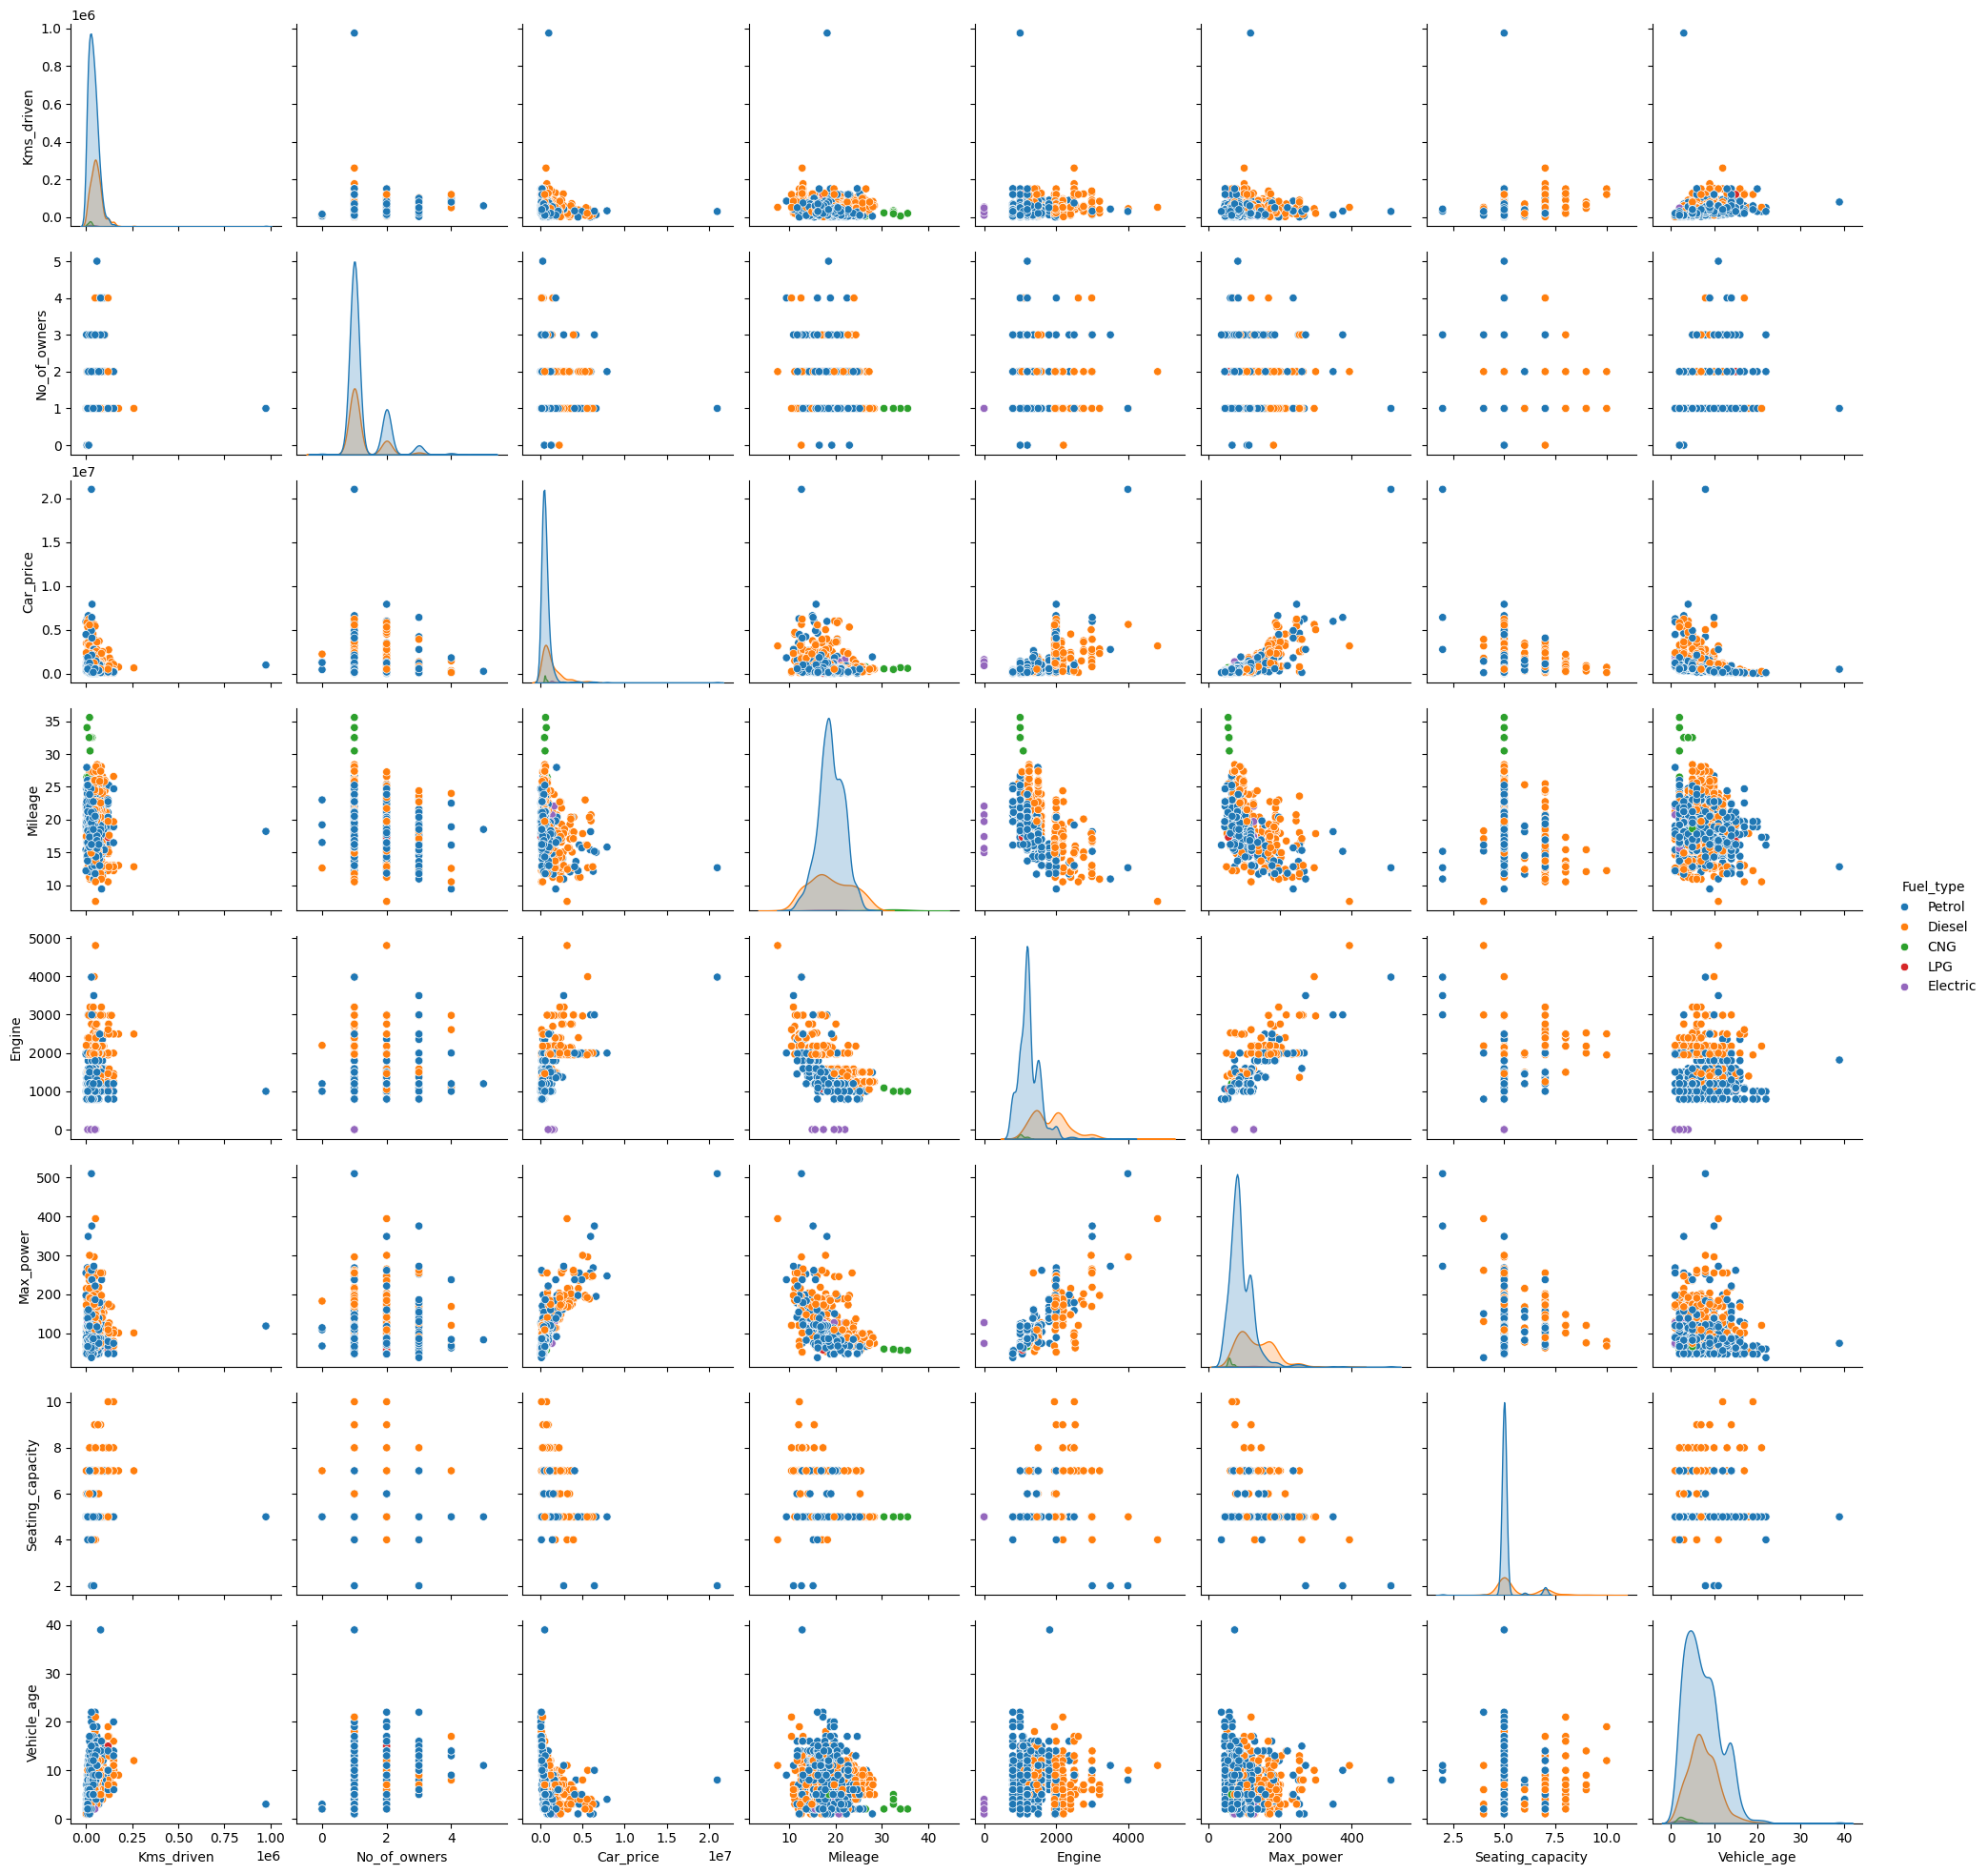

In [19]:
sns.pairplot(data=data_next, hue= 'Fuel_type', diag_kind= 'kde')

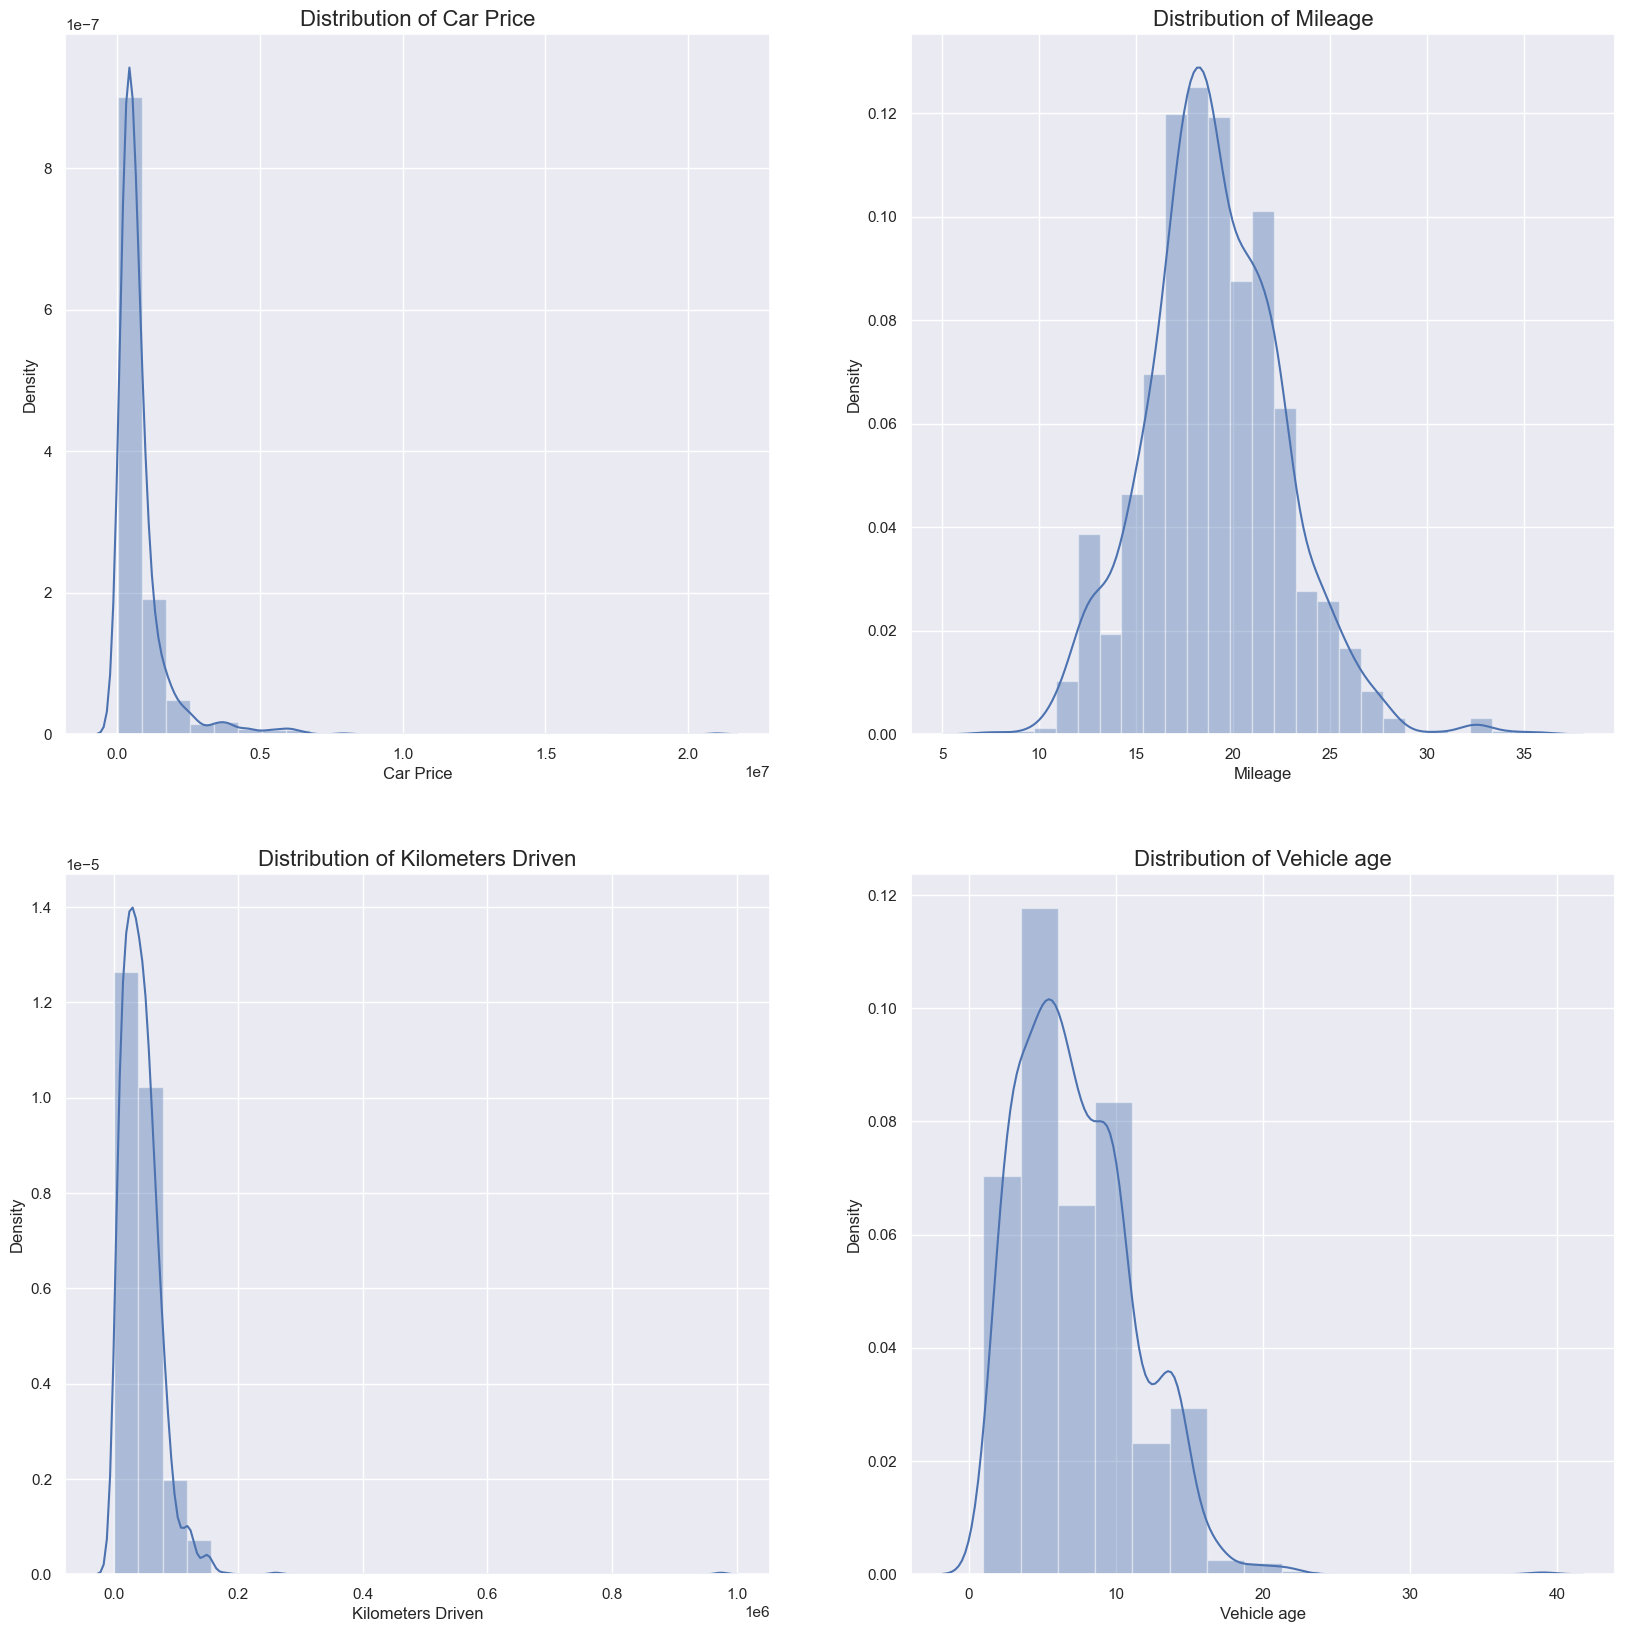

In [20]:
# Let's see the distribution of the variables from our data
fig = plt.figure(figsize=(20,20)) # create figure

sns.set(font_scale= 1)
sns.set_style('darkgrid')

ax0 = fig.add_subplot(2, 2, 1) # add subplot 1 (2 row, 2 columns, first plot)
ax1 = fig.add_subplot(2, 2, 2) # add subplot 2 (2 row, 2 columns, second plot)
ax2 = fig.add_subplot(2, 2, 3) # add subplot 1 (2 row, 2 columns, third plot)
ax3 = fig.add_subplot(2, 2, 4) # add subplot 1 (2 row, 2 columns, fourth plot)

# Subplot 1: Distplot of 'Selling_Price' feature
k1 = sns.distplot(a = data_next['Car_price'], bins= 25, ax=ax0) # add to subplot 1
ax0.set_title('Distribution of Car Price', fontsize=16)
ax0.set(xlabel= 'Car Price', ylabel= 'Density')

# Subplot 2: Distplot of 'Mileage' feature
k2 = sns.distplot(a = data_next['Mileage'], bins= 25, ax=ax1) # add to subplot 2           
ax1.set_title('Distribution of Mileage', fontsize=16)
ax1.set(xlabel= 'Mileage', ylabel= 'Density')

# Subplot 3: Distplot of 'Kms_Driven' feature
k1 = sns.distplot(a = data_next['Kms_driven'], bins= 25, ax=ax2) # add to subplot 3
ax2.set_title('Distribution of Kilometers Driven', fontsize=16)
ax2.set(xlabel= 'Kilometers Driven', ylabel= 'Density')

# Subplot 4: Distplot of 'No_of_Years' feature
k1 = sns.distplot(a = data_next['Vehicle_age'], bins= 15, ax=ax3) # add to subplot 4
ax3.set_title('Distribution of Vehicle age', fontsize=16)
ax3.set(xlabel= 'Vehicle age', ylabel= 'Density')

plt.show()
#fig.savefig("Distributionplot.png")


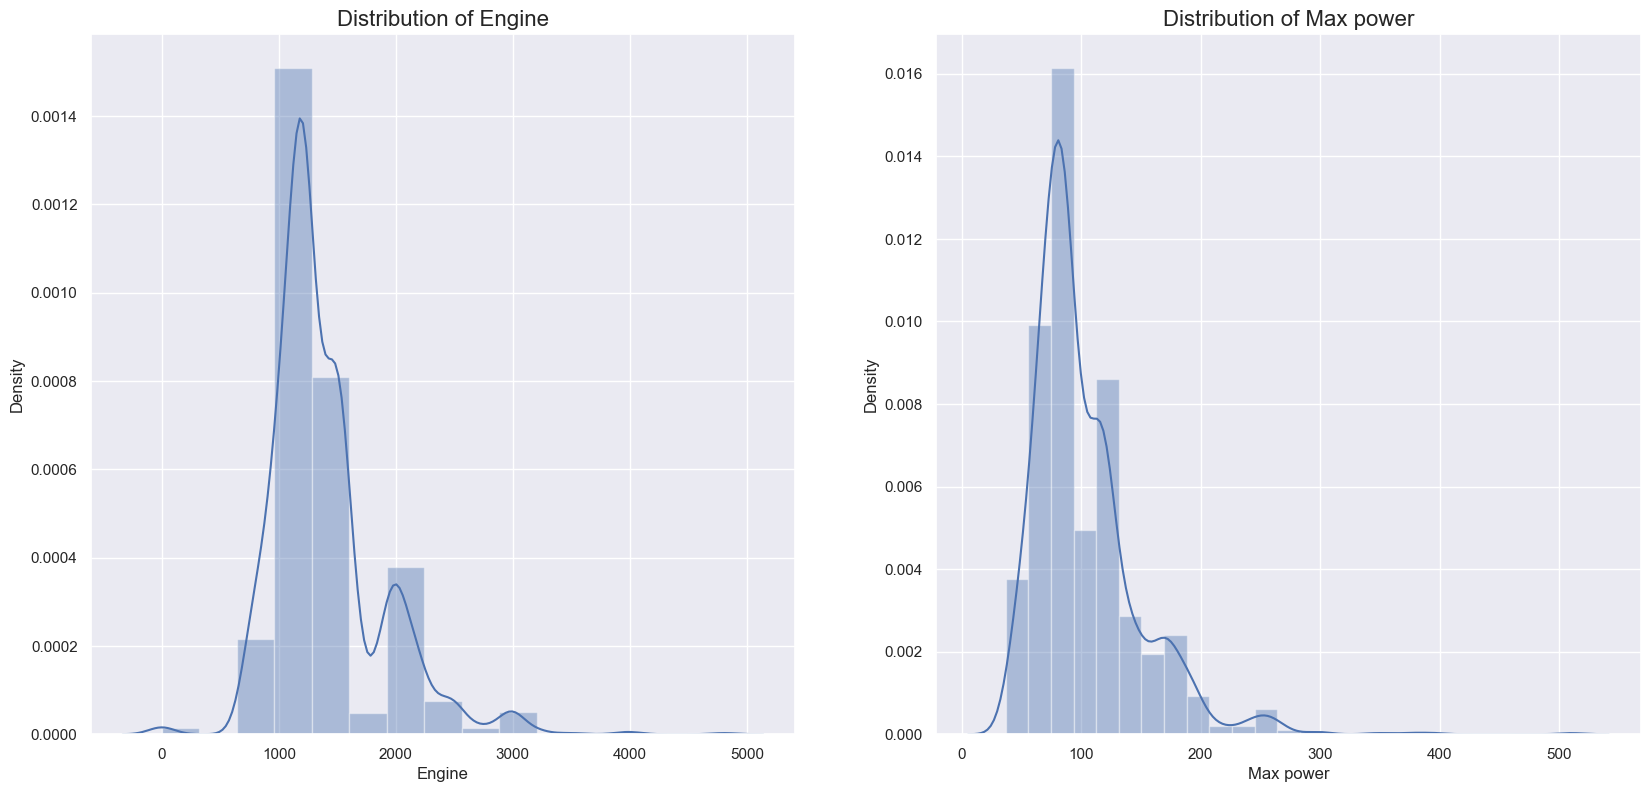

In [21]:
fig = plt.figure(figsize=(20,20)) # create figure

sns.set(font_scale= 1)
sns.set_style('darkgrid')

ax0 = fig.add_subplot(2, 2, 1) # add subplot 1 (2 row, 2 columns, first plot)
ax1 = fig.add_subplot(2, 2, 2) # add subplot 2 (2 row, 2 columns, second plot)

# Subplot 5: Distplot of 'Engine' feature
k1 = sns.distplot(a = data_next['Engine'], bins= 15, ax=ax0) # add to subplot 1
ax0.set_title('Distribution of Engine', fontsize=16)
ax0.set(xlabel= 'Engine', ylabel= 'Density')

# Subplot 6: Distplot of 'Max power' feature
k2 = sns.distplot(a = data_next['Max_power'], bins=25, ax=ax1) # add to subplot 2
ax1.set_title('Distribution of Max power', fontsize=16)
ax1.set(xlabel= 'Max power', ylabel= 'Density')

plt.show()
#fig.savefig("Distributionplot.png")

In [22]:
data_next.head()

,Car_type,Kms_driven,No_of_owners,Car_price,Fuel_type,Insurance_type,Transmission,Mileage,Engine,Max_power,Seating_capacity,Vehicle_age
0,Sedan,70000,3,975000,Petrol,Third Party insurance,Automatic,19.16,2494,158.2000,5,10
1,Hatchback,23981,1,266000,Petrol,Comprehensive,Manual,22.70,799,53.6400,5,7
2,SUV,7100,1,595000,Petrol,Comprehensive,Automatic,19.03,999,71.0100,5,3
3,Hatchback,71574,2,223000,Petrol,Third Party,Manual,17.00,1197,78.9056,5,13
4,SUV,50000,2,1200000,Diesel,Third Party insurance,Automatic,15.73,1968,174.3300,5,10


In [23]:
cols = data_next.columns.tolist()
cols=cols[4:7]+cols[:1]
cat_col = list(cols)
cat_col


['Fuel_type', 'Insurance_type', 'Transmission', 'Car_type']

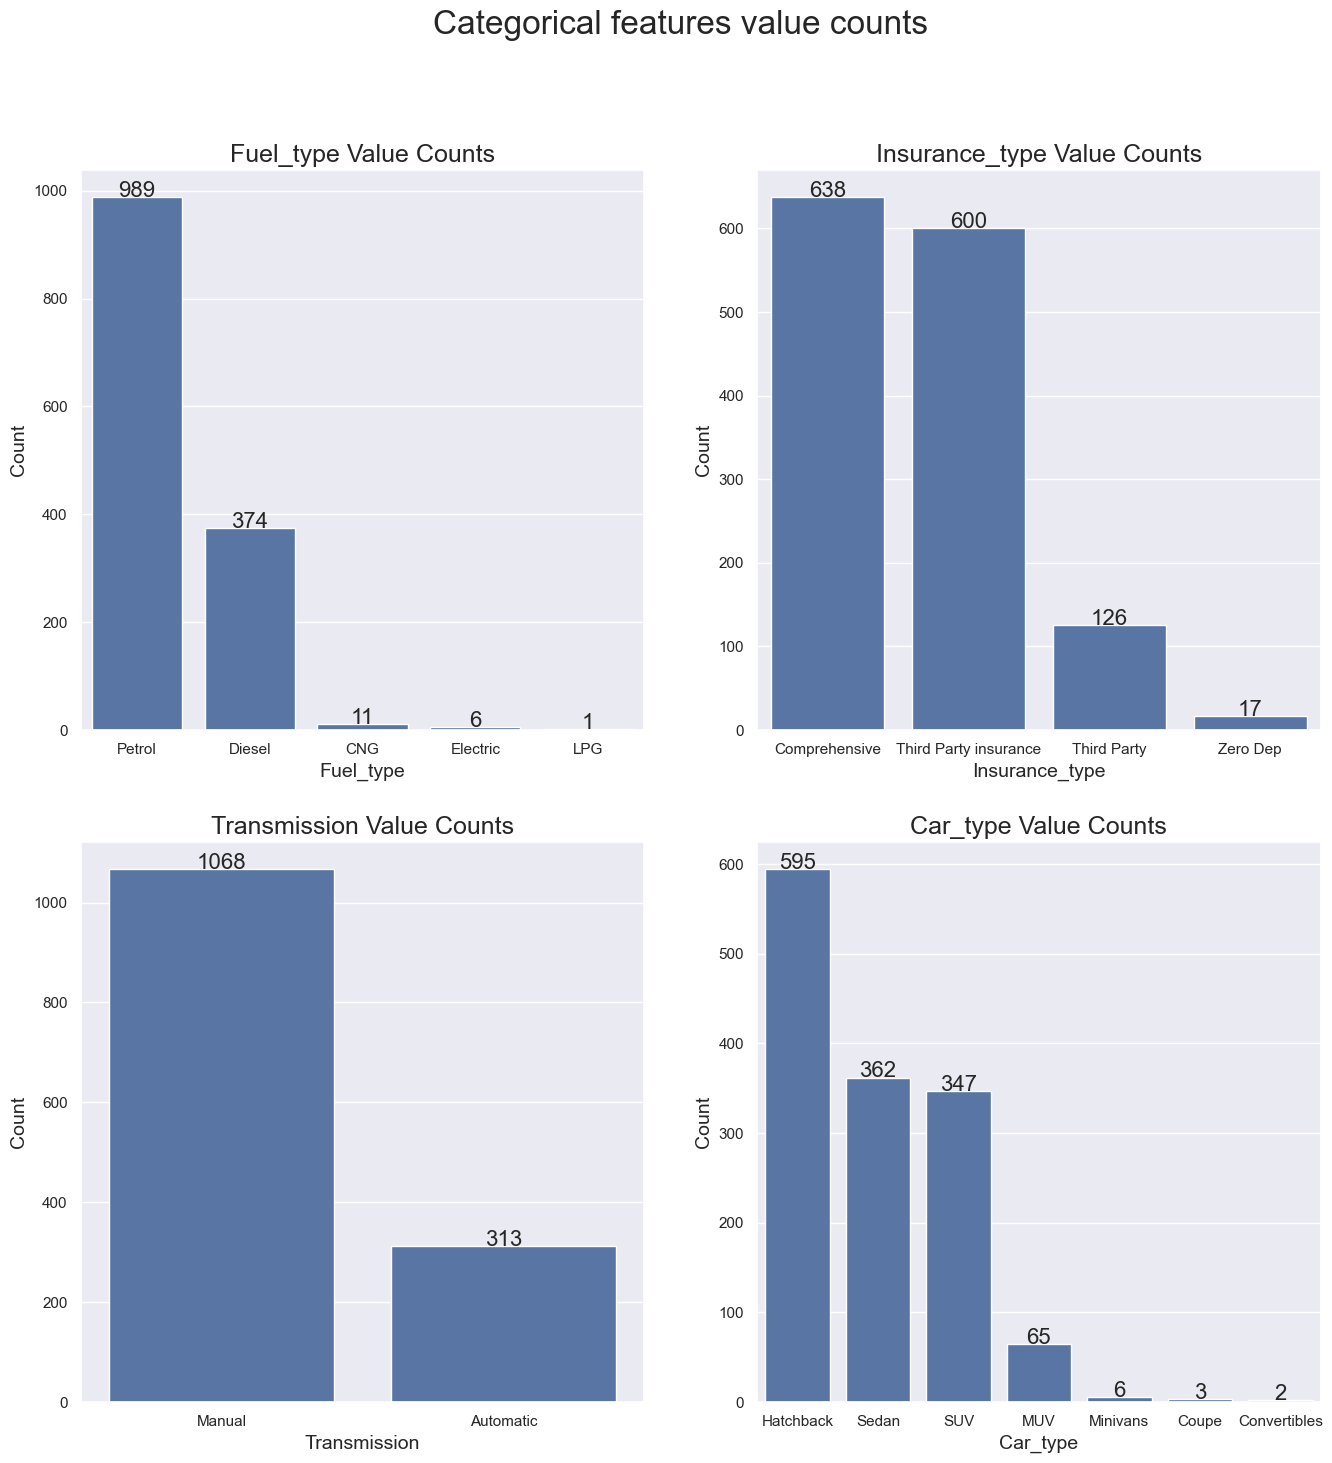

In [24]:
# Categorical variables analysis
cols = data_next.columns.tolist()
cols=cols[4:7]+cols[:1]
cat_col = list(cols)

fig = plt.figure(figsize= (16,16))
plt.suptitle('Categorical features value counts', fontsize = 24)
k=0
for i in range(1,5):
    ax = fig.add_subplot(2,2,i) 
    cat_order = data_next[cat_col[k]].value_counts()
    sns.countplot(data = data_next, x = cat_col[k], order = cat_order.index, ax= ax) 
    plt.xlabel(cat_col[k], fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.title('{} Value Counts'.format(cat_col[k]), fontsize=18)
    
    for j in range(cat_order.shape[0]):
        count = cat_order[j]
        strt='{}'.format(count)
        plt.text(j,count+0.1,strt,ha='center', fontsize=16)
    k=k+1